In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
glass_identification = fetch_ucirepo(id=42) 
  
# data (as pandas dataframes) 
X = glass_identification.data.features 
y = glass_identification.data.targets


In [2]:
type(glass_identification)


ucimlrepo.dotdict.dotdict

In [31]:
#to ignore warning
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.concat([X, y], axis=1)

In [5]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [7]:
data.to_csv('glass.csv',index=False) #for converting the data into csv file format

In [8]:
data.shape

(214, 10)

In [9]:
data.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [10]:
data.duplicated().sum()

1

In [11]:
data.dropna()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [12]:
data.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [19]:
corr = data.iloc[:,0:9].corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


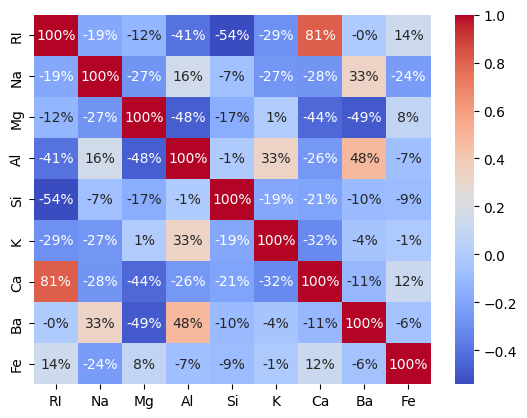

In [20]:
import seaborn as sns
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt='.0%')
plt.show()

In [21]:
data['Type_of_glass'].value_counts()

Type_of_glass
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Type_of_glass'] = le.fit_transform(data['Type_of_glass'])

In [37]:
data['Type_of_glass'].value_counts()

Type_of_glass
1    76
0    70
5    29
2    17
3    13
4     9
Name: count, dtype: int64

In [38]:
X = data.drop('Type_of_glass',axis=1)
y = data['Type_of_glass']

In [39]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [40]:
X_train.shape,y_train.shape

((171, 9), (171,))

In [41]:
X_test.shape, y_test.shape

((43, 9), (43,))

In [42]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.tree import ExtraTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [44]:
model = {
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'GaussianNB' : GaussianNB(),
    'KNeighbors Classifier' : KNeighborsClassifier(),
    'MLP classifier' : MLPClassifier(),
    'Support Vector classification' : SVC(),
    'Random Forest Classification' : RandomForestClassifier(),
    'XgBoost Classifier' : XGBClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreeClassifier(),
}

for k,v in model.items():
    md = v
    md.fit(X_train,y_train)
    y_preds = md.predict(X_test)
    print(f"The accuracy of {k} is : {accuracy_score(y_test,y_preds)*100}")
    

The accuracy of Decision Tree Classifier is : 83.72093023255815
The accuracy of GaussianNB is : 55.81395348837209
The accuracy of KNeighbors Classifier is : 69.76744186046511
The accuracy of MLP classifier is : 79.06976744186046
The accuracy of Support Vector classification is : 72.09302325581395
The accuracy of Random Forest Classification is : 79.06976744186046
The accuracy of XgBoost Classifier is : 83.72093023255815
The accuracy of Logistic Regression is : 72.09302325581395
The accuracy of Bagging is : 86.04651162790698
The accuracy of AdaBoost is : 48.837209302325576
The accuracy of Gradient Boosting is : 88.37209302325581
The accuracy of Extra Trees is : 76.74418604651163


In [46]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
ypreds=xgb.predict(X_test)
accuracy_score(ypreds,y_test)

0.8372093023255814

In [47]:
bg = RandomForestClassifier()
bg.fit(X_train,y_train)
ypreds = bg.predict(X_test)
accuracy_score(ypreds,y_test)

0.8604651162790697

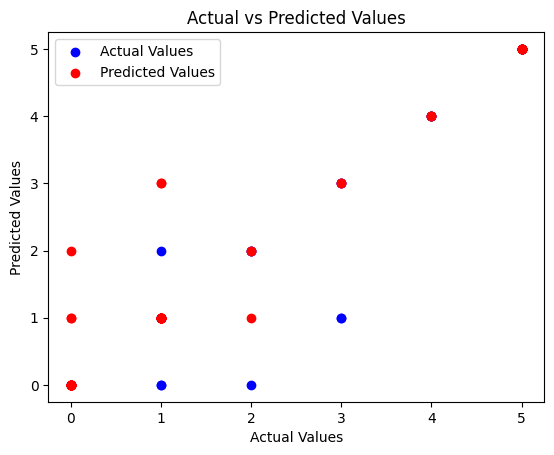

In [48]:
plt.scatter(y_test, ypreds, c='blue', label='Actual Values')  # Blue for actual values
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.scatter(ypreds,y_test, c='red', label='Predicted Values')  # Red for predicted values
plt.title('Actual vs Predicted Values')
plt.legend()  # Display legend for better clarity
plt.show()